In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [107]:
#read the data
data=pd.read_csv("Downloads/Churn.csv")

# Inspect Data

In [108]:
#inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [109]:
data.shape

(7043, 21)

In [110]:
data=data.dropna()
data.shape

(7043, 21)

In [111]:
#check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [112]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Feature Engineering

In [113]:

#convert the datatype of Total Charges to Float
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

In [114]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [115]:
data=data.dropna()
data.shape

(7032, 21)

# Feature Selection

In [116]:
#Drop Customer ID since it dies not add value to prediction
data=data.drop(['customerID'],axis=1)

In [117]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [118]:
#check for number of categories in columns
col_dtypes=['int16','int32','int64','float16','float32','float64']
data_new=data.select_dtypes(exclude=col_dtypes)

In [119]:
data_int=data.select_dtypes(include=col_dtypes)

In [120]:
data_new.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [121]:
for i in data_new.columns:
    print(str(i)+": "+str(len(data_new[i].value_counts())))

gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Churn: 2


In [122]:
#Label Encoding for categories 
from sklearn.preprocessing import LabelEncoder
print(data.columns)
#convert data into array
data=data.values

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [123]:
data[:1,:]

array([['Female', 0, 'Yes', 'No', 1, 'No', 'No phone service', 'DSL',
        'No', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes',
        'Electronic check', 29.85, 29.85, 'No']], dtype=object)

In [124]:
gender=LabelEncoder()
data[:,0] = gender.fit_transform(data[:,0])
partner=LabelEncoder()
data[:,2] = partner.fit_transform(data[:,2])
dependents=LabelEncoder()
data[:,3] = dependents.fit_transform(data[:,3])
phone_service=LabelEncoder()
data[:,5] = phone_service.fit_transform(data[:,5])
multiple_lines=LabelEncoder()
data[:,6] = multiple_lines.fit_transform(data[:,6])
internet_service=LabelEncoder()
data[:,7] = internet_service.fit_transform(data[:,7])
online_security=LabelEncoder()
data[:,8] =online_security.fit_transform(data[:,8])
online_backup=LabelEncoder()
data[:,9] =online_backup.fit_transform(data[:,9])
device_protection=LabelEncoder()
data[:,10] =device_protection.fit_transform(data[:,10])
tech_support=LabelEncoder()
data[:,11] =tech_support.fit_transform(data[:,11])
streaming_tv=LabelEncoder()
data[:,12] =streaming_tv.fit_transform(data[:,12])
streaming_movies=LabelEncoder()
data[:,13] =streaming_movies.fit_transform(data[:,13])
contract=LabelEncoder()
data[:,14] =contract.fit_transform(data[:,14])
paperless_billing=LabelEncoder()
data[:,15] =paperless_billing.fit_transform(data[:,15])
payment_method=LabelEncoder()
data[:,16] =payment_method.fit_transform(data[:,16])
churn=LabelEncoder()
data[:,-1]=churn.fit_transform(data[:,-1])

In [125]:
#examing the encoded data
data[:1]

array([[0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 29.85, 29.85,
        0]], dtype=object)

# Split Data

In [126]:
from sklearn.model_selection import train_test_split

X=data[:,:-1]
y=data[:,-1]
y=y.astype('int')

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=43,test_size=0.4)

In [128]:
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (4219, 19)
X_test shape:  (2813, 19)
y_train shape:  (4219,)
y_test shape:  (2813,)


# Build model

In [129]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [130]:
log_reg.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [131]:
pred=log_reg.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error,accuracy_score
print("Mean Squared Error: ",mean_squared_error(y_test,pred))

Mean Squared Error:  0.1983647351581941


In [133]:
print("Accuracy Score: ",accuracy_score(y_test,pred))

Accuracy Score:  0.8016352648418059


# Select column which contribute more to prediction using roc 

In [136]:
predictors=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']
target=['churn']
data=pd.DataFrame(data)
data.columns=[predictors+target]
print(data)

     gender SeniorCitizen Partner Dependents tenure PhoneService  \
0         0             0       1          0      1            0   
1         1             0       0          0     34            1   
2         1             0       0          0      2            1   
3         1             0       0          0     45            0   
4         0             0       0          0      2            1   
5         0             0       0          0      8            1   
6         1             0       0          1     22            1   
7         0             0       0          0     10            0   
8         0             0       1          0     28            1   
9         1             0       0          1     62            1   
10        1             0       1          1     13            1   
11        1             0       0          0     16            1   
12        1             0       1          0     58            1   
13        1             0       0          0    

In [228]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
auc=[]

def funct(predictors,target,data):
   
       
        X=data[predictors].values
        y=data[target].values
        y=y.astype('int')
        log_reg=LogisticRegression()
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
        log_reg.fit(X_train,y_train)
        y_pred = log_reg.predict_proba(X_test)[:,1]
        auc_roc=roc_auc_score(y_test,y_pred)
        auc.append(auc_roc)
        return auc_roc
        
    
        
 

In [233]:
cur_var=[]
aucc_list=[]
best_score=-1
for i in range(len(predictors)):
    
    
    pred=[predictors[:i+1]]
    aucc=funct(pred,target,data)
    aucc_list.append(aucc)
    if aucc>best_score:
        print(aucc)
        print(best_score)
        print(predictors[i])
        cur_var.append(predictors[i])
        best_score=aucc
    
    

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

0.4977934128049953
-1
gender
0.5583632243906425
0.4977934128049953
SeniorCitizen
0.6264889428980114
0.5583632243906425
Partner
0.6321760114339767
0.6264889428980114
Dependents
0.7516130814083952
0.6321760114339767
tenure
0.7697669360601803
0.7516130814083952
MultipleLines
0.770093752625177
0.7697669360601803
InternetService
0.7866814194425936
0.770093752625177
OnlineSecurity
0.7885329963900578
0.7866814194425936
OnlineBackup
0.7889006650256793
0.7885329963900578
DeviceProtection
0.7952678342303527
0.7889006650256793
TechSupport
0.7994796251736211
0.7952678342303527
StreamingTV
0.8008950631135722
0.7994796251736211
StreamingMovies


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

0.8155028429588869
0.8008950631135722
Contract
0.8241790172257647
0.8155028429588869
PaperlessBilling
0.8351676488425055
0.8241790172257647
MonthlyCharges
0.8378920791862728
0.8351676488425055
TotalCharges


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

In [234]:
cur_var
#we can see payments method does not return a auc score more when added to model. hence it will be removed and again it will be recalcualted.

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges']

In [243]:
len(cur_var)

17

In [231]:
aucc_list

[0.4977934128049953,
 0.5583632243906425,
 0.6264889428980114,
 0.6321760114339767,
 0.7516130814083952,
 0.7512367820536279,
 0.7697669360601803,
 0.770093752625177,
 0.7866814194425936,
 0.7885329963900578,
 0.7889006650256793,
 0.7952678342303527,
 0.7994796251736211,
 0.8008950631135722,
 0.8155028429588869,
 0.8241790172257647,
 0.8240041013177382,
 0.8351676488425055,
 0.8378920791862728]

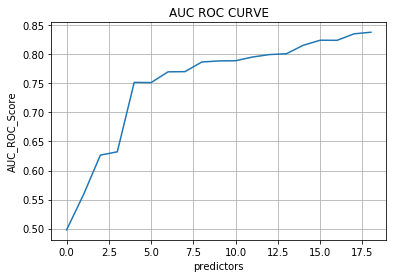

In [251]:
plt.plot(range(0,len(predictors)),aucc_list)
plt.xlabel("predictors")
plt.ylabel("AUC_ROC_Score")
plt.title("AUC ROC CURVE")
plt.grid()